# CORDIC Algorithm
This implementation of CORDIC algorithm is based on the paper '**A survey of CORDIC algorithms for FPGA based computers**' published by Ray Andraka, 1998
Following scripts demonstrates CORDIC algorithm implementation in Python 2.7. 
## Description
Cordic algoritihms can be operated in two modes: Rotation mode and Vector mode.
Variables and there description:  

| Variable | Description                         |
|----------|-------------------------------------|
| x        | x-coordinate of initial vector      |
| y        | y-coordinate of initial vector      |
| z        | Initial angle of vector with x-axis |

In [6]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import math

from __future__ import division

In [7]:
max_iter = 200;

# Modes of CORDIC Algorithms
CORDIC algorithms is usualy operated in one of the following two modes:
* **Rotation mode** 
* **Vector mode**


## Rotation Mode

In rotation mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

Equations used in rotation mode are:


\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}


\begin{equation}
^{(for \space i^{th} \space iteration)}
\end{equation}

Value of $d_{i}$ is chosen such that z reduces at each iteration. Thus after n iterations if z = 0 then


\begin{equation}
    x_{n} = A_{n} \cdot [ x_{0} \cdot cos z_{0} - y_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    x_{n} = A_{n} \cdot [ y_{0} \cdot cos z_{0} + x_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    z_{n} = 0
\end{equation}

where 

\begin{equation}
    A_{n} = {\displaystyle \prod_{i=0} ^{n}} \sqrt{1+2^{-2i}}
\end{equation}

Here A$_{n}$ $\rightarrow$ 1.647... as n $\rightarrow$ $\infty$. A$_{n}$ is also reffered as the gain of the system.


### Value of A$_{n}$ as n $\rightarrow$ $\infty$

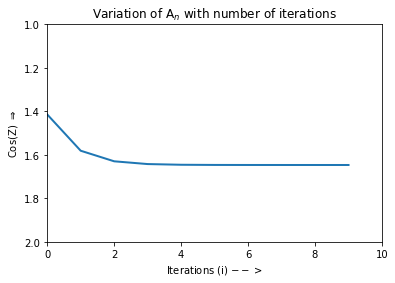

In [21]:
gain_val_list = [math.sqrt(2)];  # Stores value of gain after each iteration 
max_iter_gain = 10;              # Max number of iterations for calculating value of gain
iterations_list = [0];           # List that Stores the number of iterations performed

for i in range (1, max_iter_gain):
    gain_val_list.append(gain_val_list[i-1] * math.sqrt(1 + 2**(-2 * i)));
    iterations_list.append(i);
    
# Plot of Value of gain with number of iterations
fig = plt.figure();
ax = fig.add_subplot(111);

line, = ax.plot(iterations_list, gain_val_list,  lw=2);

ax.set_title('Variation of A$_{n}$ with number of iterations');
ax.set_xlabel('Iterations (i) $-->$');
ax.set_ylabel('Cos(Z) $\Rightarrow$');
ax.axis([0, max_iter_gain, 2, 1]);
plt.show();
plt.close();

In [8]:
def circular_mode(x, , iterations):
    a = 0.607252935;   # = 1/K

    i = 0;                  # Keeps count on number of iterations
    
    current_x = a;          # Value of X on ith iteration 
    current_y = 0;          # Value of Y on ith iteration
    current_z = angle;      # Value of Z on ith iteration
    
    di = 0;
    
    if (iterations > 0):
        for i in range(iterations):
            if (current_z > 0):
                di = +1;
            else:
                di = -1;
            next_z = current_z - di * math.degrees(math.atan(2**(-1*i)));
            next_x = current_x - di * current_y * 2**(-1*i);
            next_y = current_y + di * current_x * 2**(-1*i);
            
            #print current_z;
            
            current_x = next_x;
            current_y = next_y;
            current_z = next_z;
    #print current_z;
    return { 'sin':current_y, 'cos':current_x };


In [9]:
print circular_mode(30, 10000)

{'cos': 0.8660254037717727, 'sin': 0.4999999999926874}


## Calculations for sine and cosine

In [10]:
cosine_list = [];
sin_list = [];
iterations_list = [];

for i in range(1, max_iter):
    iterations_list.append(i);
    cosine_list.append(circular_mode(12, i)['cos']);
    sin_list.append(circular_mode(12, i)['sin']);

## Plot for cosine with number of iterations

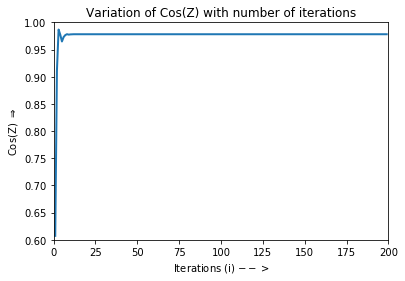

Expected value: 0.978147600734, Got: 0.978147600719


In [11]:
# Plot for cos
# ----
fig = plt.figure();
ax = fig.add_subplot(111);

line, = ax.plot(iterations_list, cosine_list,  lw=2);

ax.set_title('Variation of Cos(Z) with number of iterations');
ax.set_xlabel('Iterations (i) $-->$');
ax.set_ylabel('Cos(Z) $\Rightarrow$');
ax.axis([0, max_iter, 0.6, 1]);
plt.show();
plt.close();

print "Expected value: " + str(math.cos(math.radians(12))) + ", Got: " + str(cosine_list[max_iter - 2]);

## Plot for Sine with number of iterations
Plots for value of sine and cosine for a given angle and number of iterations shows how their value approaches actual value with increase in number of iterations

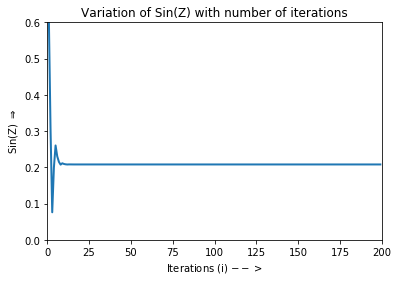

Expected value: 0.207911690818, Got: 0.207911690815


In [12]:
# Plot for sin
# ----
fig = plt.figure();
ax = fig.add_subplot(111);

line, = ax.plot(iterations_list, sin_list,  lw=2);

ax.set_title('Variation of Sin(Z) with number of iterations');
ax.set_xlabel('Iterations (i) $-->$');
ax.set_ylabel('Sin(Z) $\Rightarrow$');
ax.axis([0, max_iter, 0, 0.6]);
plt.show();
plt.close();

print "Expected value: " + str(math.sin(math.radians(12))) + ", Got: " + str(sin_list[max_iter-2]);

# Vector mode

In [32]:
def vector_mode(x, y, z, iterations):
    a = 0.607252935;   # = 1/K
    
    i = 0;                  # Keeps count on number of iterations
    
    current_x = x;          # Value of X on ith iteration 
    current_y = y;      # Value of Y on ith iteration
    current_z = z;          # Value of Z on ith iteration
    
    di = 0;
    
    if (iterations > 0):
        for i in range(iterations):
            if (current_y < 0):
                di = +1;
            else:
                di = -1;
            next_z = current_z - di * math.degrees(math.atan(2**(-1*i)));
            next_x = current_x - di * current_y * 2**(-1*i);
            next_y = current_y + di * current_x * 2**(-1*i);
            
            #print current_z;
            
            current_x = next_x;
            current_y = next_y;
            current_z = next_z;
    return { 'atan':current_z};


## Calculations for magnitude of vector

In [33]:
mag_list = [];
iterations_list = [];

i = 10;
for i in range(1, max_iter):
    iterations_list.append(i);
    atan_list.append(vector_mode(1, 12, 0, i)['atan']);

## Plot for tan$^{-1}$(y) with number of iterations

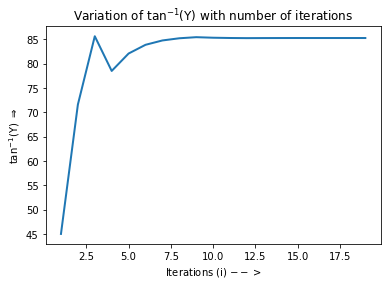

Expected value: 85.2363583093, Got: 85.2362360745


In [34]:
# Plot for cos
# ----
fig = plt.figure();
ax = fig.add_subplot(111);

line, = ax.plot(iterations_list, atan_list,  lw=2);

ax.set_title('Variation of tan$^{-1}$(Y) with number of iterations');
ax.set_xlabel('Iterations (i) $-->$');
ax.set_ylabel('tan$^{-1}$(Y) $\Rightarrow$');
plt.show();
plt.close();

print "Expected value: " + str(math.degrees(math.atan(12))) + ", Got: " + str(atan_list[max_iter - 2]);

## Calculations for tan$^{-1}$(y)

In [33]:
atan_list = [];
iterations_list = [];

i = 10;
for i in range(1, max_iter):
    iterations_list.append(i);
    atan_list.append(vector_mode(1, 12, 0, i)['atan']);

## Plot for tan$^{-1}$(y) with number of iterations

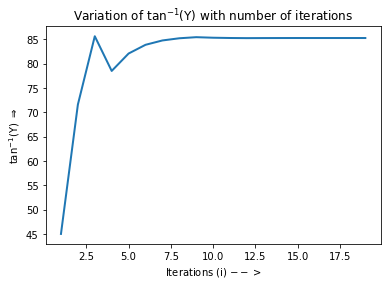

Expected value: 85.2363583093, Got: 85.2362360745


In [34]:
# Plot for cos
# ----
fig = plt.figure();
ax = fig.add_subplot(111);

line, = ax.plot(iterations_list, atan_list,  lw=2);

ax.set_title('Variation of tan$^{-1}$(Y) with number of iterations');
ax.set_xlabel('Iterations (i) $-->$');
ax.set_ylabel('tan$^{-1}$(Y) $\Rightarrow$');
plt.show();
plt.close();

print "Expected value: " + str(math.degrees(math.atan(12))) + ", Got: " + str(atan_list[max_iter - 2]);

## Magnitude of a vector

# References
1. [*A survey of CORDIC algorithms for FPGA based computers*](http://portal.acm.org/citation.cfm?doid=275107.275139) by Andraka, Ray (1998).
2. *Cordic_Architeutre - QIP STC-Image Processing using VLSI architecture* by Das, Bishnu Prasad (2016)